# Laboratory exercise 6

The notebook contains exercises connected to auditory exercise 7. For any questions feel free to contact assistant: eda.jovicic@fer.hr

The main task of this notebook is to make predictions using supported learning with the Scikit Learn library. The goal is to predict the grade in Math considering other features of the student.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

1. Load the cleaned dataset from the first exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [8]:
file_path = r'C:\Users\Kristina Vrdoljak\Desktop\AppCogSci\data science\Week 3\2nd homework assignment-20240104\X_clean.csv'
data = pd.read_csv(file_path)
data


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_male,LunchType_standard
0,0,female,2,1,standard,1,1,1,10,3.0,1,1,71,71,74,0,1
1,1,female,2,5,standard,1,1,2,10,0.0,2,0,69,90,88,0,1
2,2,female,1,3,standard,1,2,2,10,4.0,1,1,87,93,91,0,1
3,3,male,0,0,free/reduced,1,1,0,3,1.0,2,0,45,56,42,1,0
4,4,male,2,5,standard,1,1,2,10,0.0,1,0,76,78,75,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112,29112,female,3,2,standard,1,2,2,3,2.0,1,0,59,61,65,0,1
29113,29113,male,4,2,standard,1,2,1,3,1.0,0,0,58,53,51,1,1
29114,29114,female,2,2,free/reduced,0,1,2,3,1.0,0,0,61,70,67,0,0
29115,29115,female,3,0,standard,0,1,1,3,3.0,1,0,82,90,93,0,1


2. Transform the MathScore feature into grades (1-5) using the following scoring system:

|   MathScore |  Grade  |
| ----------- | ------- |
|  88 - 100   |    5    |
|  75 - 87    |    4    |
|  63 - 74    |    3    |
|  50 - 62    |    2    |
|   0 - 49    |    1    |

In [9]:
def score_to_grade(score):
    if 88<=score<=100:
        return 5
    elif 75<=score<=87:
        return 4
    elif 63<=score<=74:
        return 3
    elif 50<=score<=62:
        return 2
    else:
        return 1
data['Grade'] = data['MathScore'].apply(score_to_grade)


In [8]:
data

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_male,LunchType_standard,Grade
0,female,2,1,standard,1,1,1,1,3.0,1,1,71,71,74,0,1,3
1,female,2,5,standard,1,1,2,1,0.0,2,0,69,90,88,0,1,3
2,female,1,3,standard,1,2,2,1,4.0,1,1,87,93,91,0,1,4
3,male,0,0,free/reduced,1,1,0,0,1.0,2,0,45,56,42,1,0,1
4,male,2,5,standard,1,1,2,1,0.0,1,0,76,78,75,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112,female,3,2,standard,1,2,2,0,2.0,1,0,59,61,65,0,1,2
29113,male,4,2,standard,1,2,1,0,1.0,0,0,58,53,51,1,1,2
29114,female,2,2,free/reduced,0,1,2,0,1.0,0,0,61,70,67,0,0,2
29115,female,3,0,standard,0,1,1,0,3.0,1,0,82,90,93,0,1,4


3. Divide the dataset into features (X) and predictions (y). For features we will use all the columns except MathScore, ReadingScore and WritingScore. For predictions we will use the MathScore column. Split the dataset into training and testing sets. The split should be done in a  70-30% ratio.

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

feature_cols = ['EthnicGroup', 'ParentEduc', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport',
                'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'Gender_male', 'LunchType_standard']
pred_cols = ['MathScore']  

x = data[feature_cols]
y = data[pred_cols]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (20381, 11)
X_test shape: (8736, 11)
y_train shape: (20381, 1)
y_test shape: (8736, 1)


4. Create a Random Forest model, with max_depth=5 and n_estimators=20. Train the model using training set, and then test it on testing set. Display the confusion matrix. Show precision, recall and F1 score for all grades. 

In [14]:
model = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=20 )
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.54      0.02      0.05      1174
           2       0.35      0.40      0.37      2200
           3       0.33      0.65      0.44      2547
           4       0.38      0.22      0.28      2027
           5       0.00      0.00      0.00       788

    accuracy                           0.34      8736
   macro avg       0.32      0.26      0.23      8736
weighted avg       0.35      0.34      0.29      8736



C:\Users\Kristina Vrdoljak\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Kristina Vrdoljak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kristina Vrdoljak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kristina Vrdoljak\anaconda3\Lib\site-packages\sklearn\met

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=20)

Y_pred = cross_val_predict(model, X, Y, cv=5)

print(classification_report(Y, Y_pred))



C:\Users\Kristina Vrdoljak\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Kristina Vrdoljak\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Kristina Vrdoljak\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Kristina Vrdoljak\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4016
           1       0.86      1.00      0.93     25101

    accuracy                           0.86     29117
   macro avg       0.43      0.50      0.46     29117
weighted avg       0.74      0.86      0.80     29117



C:\Users\Kristina Vrdoljak\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Kristina Vrdoljak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kristina Vrdoljak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kristina Vrdoljak\anaconda3\Lib\site-packages\sklearn\met

C:\Users\Katarina\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Katarina\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Katarina\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.54      0.03      0.06      1174
           2       0.35      0.40      0.38      2200
           3       0.33      0.64      0.44      2547
           4       0.38      0.23      0.28      2027
           5       0.00      0.00      0.00       788

    accuracy                           0.35      8736
   macro avg       0.32      0.26      0.23      8736
weighted avg       0.35      0.35      0.30      8736



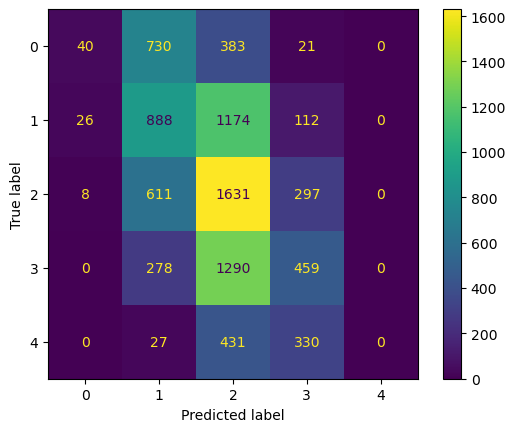

In [13]:
cm=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

print(classification_report(y_test, y_pred))


5. The accuracy of our model is not the best. The reason could be having too many possible classes (grades). Let's transform the data again, but this time, instead of predicting grades, we want to predict whether the student will pass (grades 2, 3, 4 and 5) or fail (grade 1) math. After transforming the MathScore accordingly (0 - failed, 1 - passed), repeat task 4 and compare the results.

In [16]:
def transform(grade):
    if grade>1:
        return 1
    else:
        return 0
data['pass_fail']=data['Grade'].apply(transform)
data


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_male,LunchType_standard,Grade,pass_fail
0,0,female,2,1,standard,1,1,1,10,3.0,1,1,71,71,74,0,1,3,1
1,1,female,2,5,standard,1,1,2,10,0.0,2,0,69,90,88,0,1,3,1
2,2,female,1,3,standard,1,2,2,10,4.0,1,1,87,93,91,0,1,4,1
3,3,male,0,0,free/reduced,1,1,0,3,1.0,2,0,45,56,42,1,0,1,0
4,4,male,2,5,standard,1,1,2,10,0.0,1,0,76,78,75,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112,29112,female,3,2,standard,1,2,2,3,2.0,1,0,59,61,65,0,1,2,1
29113,29113,male,4,2,standard,1,2,1,3,1.0,0,0,58,53,51,1,1,2,1
29114,29114,female,2,2,free/reduced,0,1,2,3,1.0,0,0,61,70,67,0,0,2,1
29115,29115,female,3,0,standard,0,1,1,3,3.0,1,0,82,90,93,0,1,4,1


In [17]:
feature_cols=['EthnicGroup','ParentEduc','TestPrep','ParentMaritalStatus','PracticeSport','IsFirstChild','NrSiblings','TransportMeans','WklyStudyHours','Gender_male','LunchType_standard']
pred_col=['pass_fail']
X=data[feature_cols]
Y=data[pred_col]


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42) 

In [19]:
model = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=20)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(classification_report(Y_test,Y_pred))



              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1174
           1       0.87      1.00      0.93      7562

    accuracy                           0.87      8736
   macro avg       0.43      0.50      0.46      8736
weighted avg       0.75      0.87      0.80      8736



C:\Users\Kristina Vrdoljak\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Kristina Vrdoljak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kristina Vrdoljak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kristina Vrdoljak\anaconda3\Lib\site-packages\sklearn\met

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1174
           1       0.87      1.00      0.93      7562

    accuracy                           0.87      8736
   macro avg       0.43      0.50      0.46      8736
weighted avg       0.75      0.87      0.80      8736



C:\Users\Kristina Vrdoljak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kristina Vrdoljak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kristina Vrdoljak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


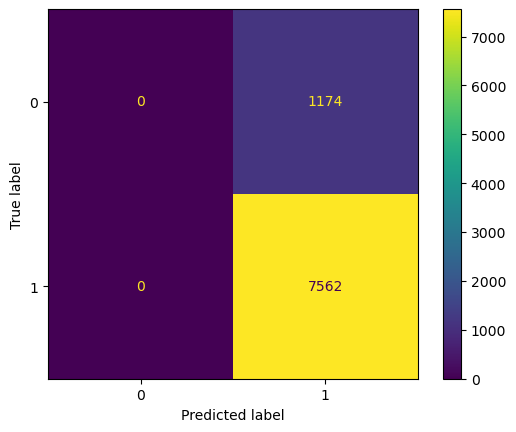

In [20]:
cm=confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(cm).plot()

print(classification_report(Y_test, Y_pred))

6. Compare the results. Did our model work better in the first case or the second? Explain why and suggest a way to improve it.

In [21]:
model = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=20)
model.fit(X,Y)
Y_pred = cross_val_predict(model, X, Y, cv=5)

print(classification_report(Y,Y_pred))

C:\Users\Kristina Vrdoljak\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Kristina Vrdoljak\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Kristina Vrdoljak\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Kristina Vrdoljak\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4016
           1       0.86      1.00      0.93     25101

    accuracy                           0.86     29117
   macro avg       0.43      0.50      0.46     29117
weighted avg       0.74      0.86      0.80     29117



C:\Users\Kristina Vrdoljak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kristina Vrdoljak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kristina Vrdoljak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
from sklearn.metrics import accuracy_score
number_trees = [n for n in range(1, 21)]
accuracy_scores=[]
for nt in number_trees:
    model=RandomForestClassifier(max_depth=5,random_state=0, n_estimators=nt)
    model.fit(X_train, Y_train.values.ravel())
    Y_pred=model.predict(X_test)
    accuracy_scores.append(accuracy_score(Y_test,Y_pred))
accuracy_scores   

[0.8654990842490843,
 0.8654990842490843,
 0.8654990842490843,
 0.8654990842490843,
 0.8654990842490843,
 0.8654990842490843,
 0.8656135531135531,
 0.8656135531135531,
 0.8656135531135531,
 0.8656135531135531,
 0.8656135531135531,
 0.8656135531135531,
 0.8656135531135531,
 0.8656135531135531,
 0.8656135531135531,
 0.8656135531135531,
 0.8656135531135531,
 0.8656135531135531,
 0.8656135531135531,
 0.8656135531135531]